In [1]:
from caik import cai
import skrf as rf
from caik import matrixDecoder as md
import os
import win32com.client
import time

In [2]:
%matplotlib inline
rf.stylely()
rf.stylely()
key = cai.CAI(start = True, resolution = 20, dimension = 4)
key.esp.current_axis = 2

In [3]:
def take_pic():
    Application = win32com.client.Dispatch("PowerPoint.Application")
    Presentation = Application.Presentations.Open('C:\\Users\\Michael\\Documents\\GitHub\\THzCAI\\Research\\Imaging Worksheets\\Misc\\Hadamard Masks 5.pptx')
    Slideshow = Application.ActivePresentation.SlideShowSettings.Run()
    Application.SlideShowWindows[0].View.GotoSlide(1)
    time.sleep(5)
    key.zva.write_data('dark')
    dark_cal = key.take_simple_cal()
    dark_cal.write('dark_cal')
    for x in range (2, 2050):
        if x % 2 == 0:
            DIR = 'mask' + str(x / 2)
            os.makedirs(DIR)
            os.chdir(DIR)
        else:
            DIR = 'mask' + str((x - 1) / 2)
        Application.SlideShowWindows[0].View.GotoSlide(1)
        time.sleep(2)
        Application.SlideShowWindows[0].View.GotoSlide(x)
        time.sleep(2)
        if x % 2 == 0:
            ntwk = key.zva.write_data('mask' + str(x / 2))
            ntwk_cal = key.take_simple_cal()
            ntwk_cal.write(DIR + '_cal')
        else:
            ntwk = key.zva.write_data('mask' + str((x - 1) / 2) + '_inverse')
            ntwk_cal = key.take_simple_cal()
            ntwk_cal.write(DIR + '_inverse_cal')
            os.chdir('..')
    Application.SlideShowWindows[0].View.Exit()

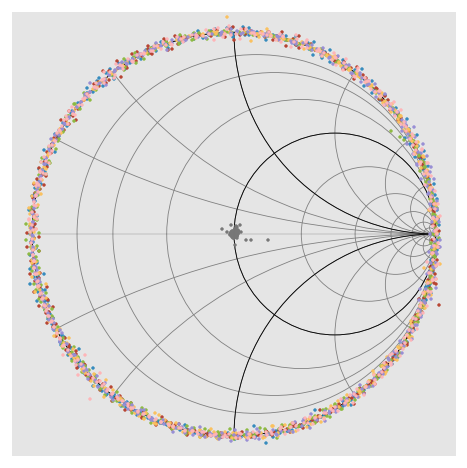

In [5]:
cal = key.take_simple_cal(match = True)

In [6]:
cal.write('no_light_absorber_cal')

In [8]:
key.zva.write_data('off')

In [9]:
off = rf.Network('off.s1p')
off_caled = cal.apply_cal(off)
off_caled.name = off.name + ' corrected'

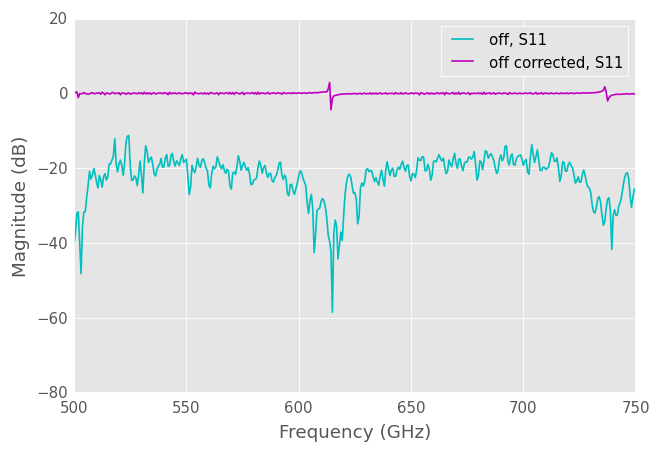

In [10]:
off.plot_s_db(color = 'c')
off_caled.plot_s_db(color = 'm')

C:\Users\Michael\Anaconda\lib\site-packages\scikit_rf-0.16.1.dev0-py2.7.egg\skrf\vi\vna.py:1502: UserWarning: Retriving active trace is not functional. This is a stub.
  warn('Retriving active trace is not functional. This is a stub.')


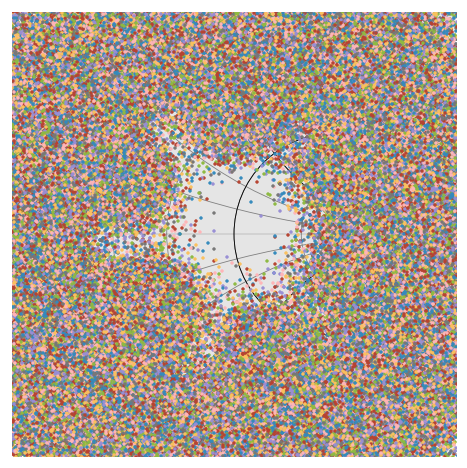

In [6]:
take_pic()

In [5]:
pwd

u'C:\\Users\\Michael\\Documents\\GitHub\\THzCAI\\Research\\Imaging Worksheets\\Imaging\\Trial 1'

In [4]:
os.chdir('C:\\Users\\Michael\\Documents\\GitHub\\THzCAI\\Research\\Imaging Worksheets\\Imaging\\Trial 1')

In [7]:
key.matrixList

['111-111-111----1111-111-111----1111-111-111----1---1---1---1111-111-111-111----1111-111-111----1111-111-111----1---1---1---1111-111-111-111----1111-111-111----1111-111-111----1---1---1---1111----1---1---1111----1---1---1111----1---1---1111-111-111-111----1',
 '---1---1---1111----1---1---1111----1---1---1111-111-111-111----1111-111-111----1111-111-111----1111-111-111----1---1---1---1111-111-111-111----1111-111-111----1111-111-111----1---1---1---1111-111-111-111----1111-111-111----1111-111-111----1---1---1---1111-',
 '111-111-111----1111-111-111----1111-111-111----1---1---1---1111-111-111-111----1111-111-111----1111-111-111----1---1---1---1111----1---1---1111----1---1---1111----1---1---1111-111-111-111----1111-111-111----1111-111-111----1111-111-111----1---1---1---1111-',
 '111-111-111----1111-111-111----1111-111-111----1---1---1---1111----1---1---1111----1---1---1111----1---1---1111-111-111-111----1111-111-111----1111-111-111----1111-111-111----1---1---1---1111-111-111-111----1111-111

In [9]:
new = cai.recursion_fix(4, key.matrixList)

In [10]:
new

['11111111111111111-1-1-1-1-1-1-1-11--11--11--11--1--11--11--11--11111----1111----1-1--1-11-1--1-111----1111----111--1-11-1--1-11-11111111--------1-1-1-1--1-1-1-111--11----11--111--11--1-11--11-1111--------11111-1--1-1-1-11-1-11----11--1111--1--1-11--11-1--1',
 '--------11111111-1-1-1-11-1-1-1---11--1111--11---11--11-1--11--1----11111111-----1-11-1-1-1--1-1--1111--11----11-11-1--11--1-11-11111111111111111-1-1-1-1-1-1-1-11--11--11--11--1--11--11--11--11111----1111----1-1--1-11-1--1-111----1111----111--1-11-1--1-11-',
 '11111111111111111-1-1-1-1-1-1-1-11--11--11--11--1--11--11--11--11111----1111----1-1--1-11-1--1-111----1111----111--1-11-1--1-11---------11111111-1-1-1-11-1-1-1---11--1111--11---11--11-1--11--1----11111111-----1-11-1-1-1--1-1--1111--11----11-11-1--11--1-11-',
 '11111111--------1-1-1-1--1-1-1-111--11----11--111--11--1-11--11-1111--------11111-1--1-1-1-11-1-11----11--1111--1--1-11--11-1--111111111111111111-1-1-1-1-1-1-1-11--11--11--11--1--11--11--11--11111----1111----1-1--1-

In [11]:
f = open("matrices_1.txt", "w")
for i in range(0,  len(new)):
    string = ""
    for x in range(0, len(new)):
        if new[i][x] == '-':
            string += '0'
        else:
            string += '1'
    f.write(string + '\n')
f.close

<function close>

In [12]:
f = open("matrices_0.txt", "w")
for matrix in new:
    f.write(matrix + '\n')
f.close

<function close>

In [13]:
def get_mag(freq, base_dir):
    DIR = os.getcwd()
    os.chdir(base_dir)
    f = open('mask1.s1p', 'r')
    line = f.readline()
    while True:
        if line[0:3] == str(freq)[0:3]:
            break
        line = f.readline()
    index = 0
    for c in range(0, len(line)):
        if line[c] == ' ':
            index = c
            break
    line = line[index + 1:]
    for c in range(0, len(line)):
        if line[c] == ' ':
            index = c
            break
    line = line[:index]
    return float(line)

IOError: [Errno 2] No such file or directory: 'object corrected.s1p'

In [ ]:
from numpy.linalg import inv
m1 = np.matrix(measured_1)
m2 = inv(np.matrix(arrays))
calc_1 = np.dot(m2, m1)

In [ ]:
from matplotlib import pyplot as plt
import skrf as rf
rf.stylely()
%matplotlib inline
image = np.reshape(calc_1, (8, 8))
plt.imshow(image, vmin = np.amin(calc_1), vmax = np.amax(calc_1) ) #, interpolation = "nearest")